# Задача

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

**Набор данных включает следующие поля:**
* _'Churn'_ — факт оттока в текущем месяце;
* Текущие поля в датасете:
 * Данные клиента за предыдущий до проверки факта оттока месяц:
   * _'gender'_ — пол;
   * _'Near_Location'_ — проживание или работа в районе, где находится фитнес-центр;
   * _'Partner'_ — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
   * _Promo_friends_ — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
   * _'Phone'_ — наличие контактного телефона;
   * _'Age'_ — возраст;
   * _'Lifetime'_ — время с момента первого обращения в фитнес-центр (в месяцах).
* Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
  * _'Contract_period'_ — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
  * _'Month_to_end_contract'_ — срок до окончания текущего действующего абонемента (в месяцах);
  * _'Group_visits'_ — факт посещения групповых занятий;
  * _'Avg_class_frequency_total'_ — средняя частота посещений в неделю за все время с начала действия абонемента;
  * _'Avg_class_frequency_current_month'_ — средняя частота посещений в неделю за предыдущий месяц;
  * _'Avg_additional_charges_total'_ — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

# Содержание

[Шаг 1. Загрузка данных](#Шаг-1.-Загрузка-данных)

[Шаг 2. Проведение исследовательского анализа данных (EDA)](#Шаг-2.-Проведение-исследовательского-анализа-данных-(EDA))

[Выводы к шагу 2](#Выводы-к-шагу-2)

[Шаг 3. Построение модели прогнозирования оттока клиентов](#Шаг-3.-Построение-модели-прогнозирования-оттока-клиентов)

[Выводы к шагу 3](#Выводы-к-шагу-3)

[Шаг 4. Кластеризация клиентов](#Шаг-4.-Кластеризация-клиентов)

[Выводы к шагу 4](#Выводы-к-шагу-4)

[Общий вывод](#Общий-вывод)

# Шаг 1. Загрузка данных

In [1]:
# подключим необходимые библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
warnings.filterwarnings("ignore")

In [3]:
fitness = pd.read_csv('/datasets/gym_churn.csv')

In [4]:
fitness.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


# Шаг 2. Проведение исследовательского анализа данных (EDA)

In [5]:
fitness.columns = fitness.columns.str.lower().str.replace(' ', '_')

In [6]:
fitness.shape

(4000, 14)

In [7]:
fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [8]:
fitness.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [9]:
fitness.duplicated().sum()

0

In [31]:
fitness.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250,1.669000
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521,1.418253
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000,4.000000


In [11]:
fitness.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


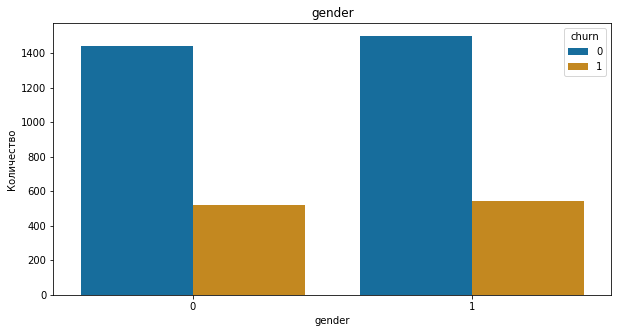

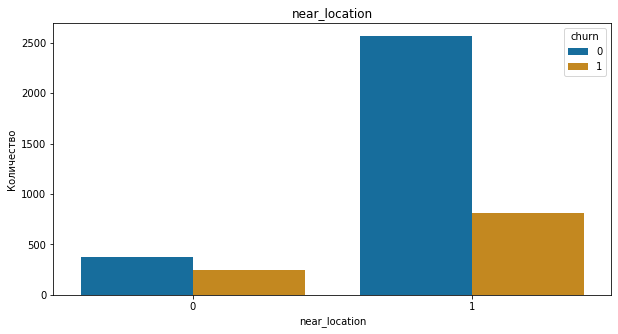

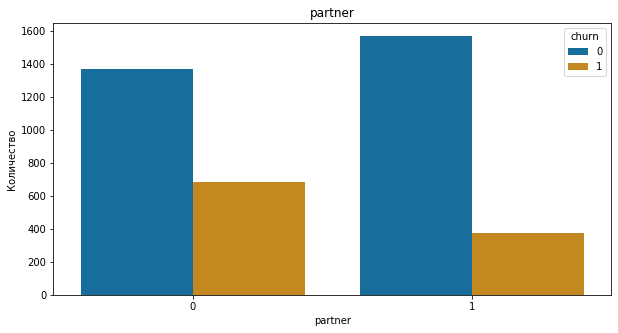

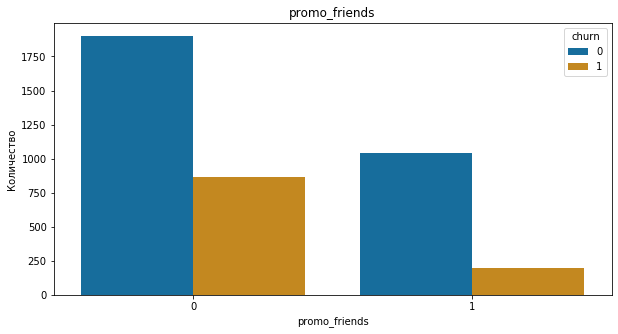

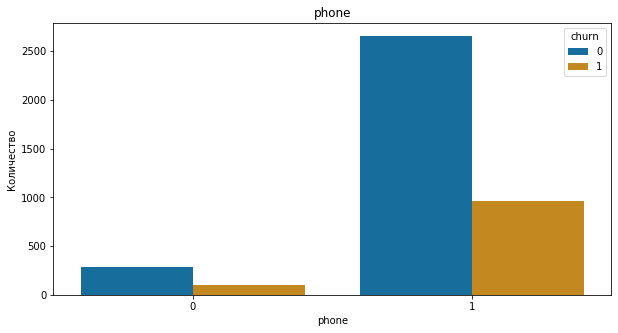

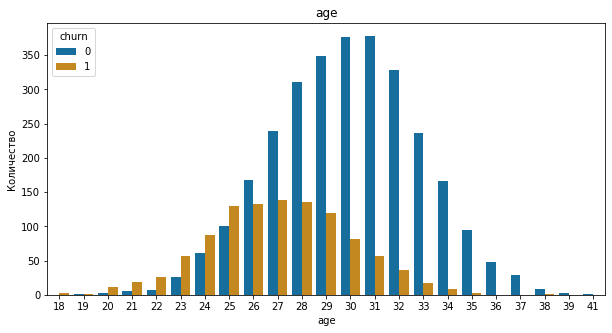

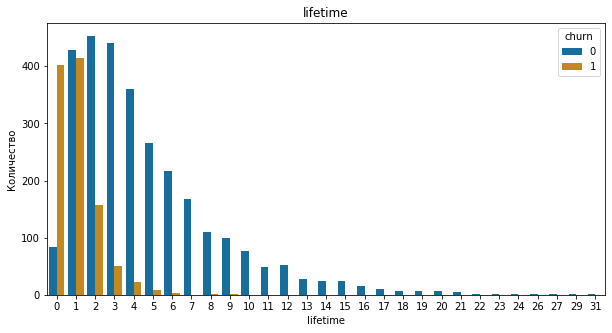

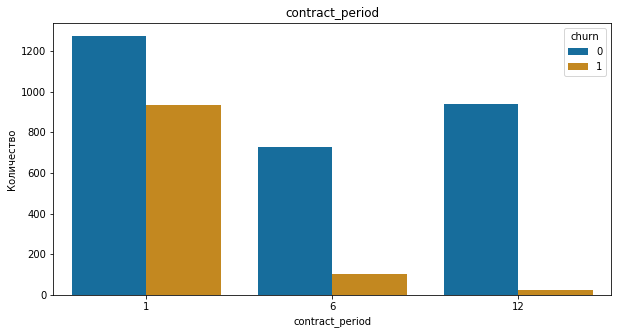

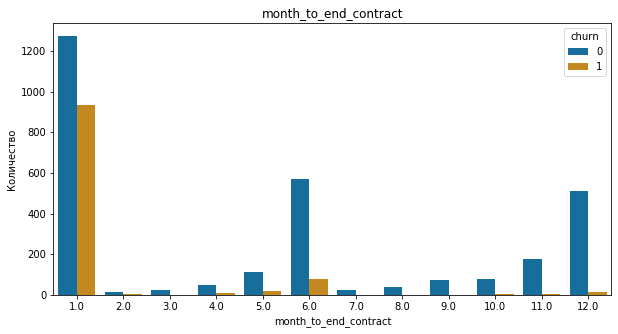

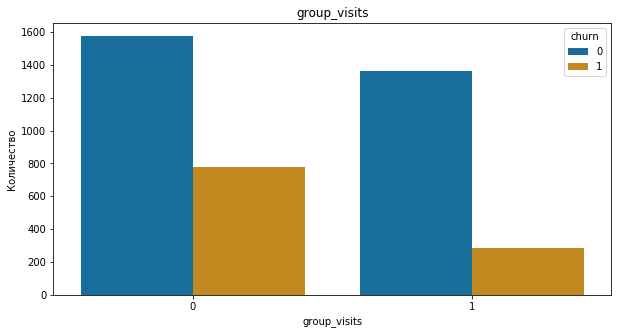

In [12]:
for col in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'age', 'lifetime', 'contract_period', 'month_to_end_contract', 'group_visits']:
    plt.figure(figsize=(10, 5))
    sns.countplot(x = fitness[col], hue = 'churn', data = fitness, palette='colorblind')
    plt.title(col)
    plt.ylabel('Количество')
    plt.show()

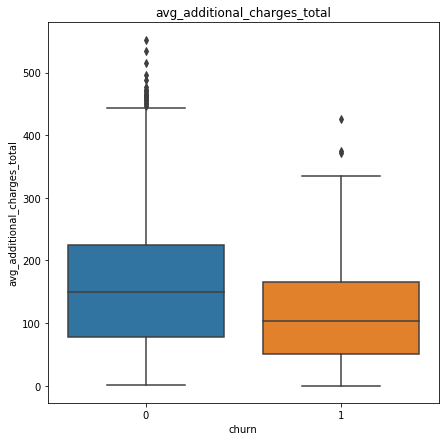

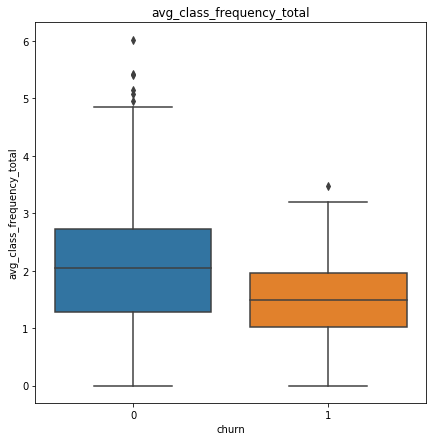

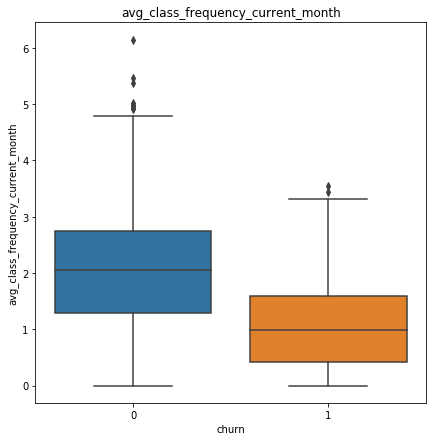

In [13]:
for col in ['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize = (7, 7))
    sns.boxplot(x = 'churn', y = fitness[col], data = fitness)
    plt.title(col)
    plt.show()

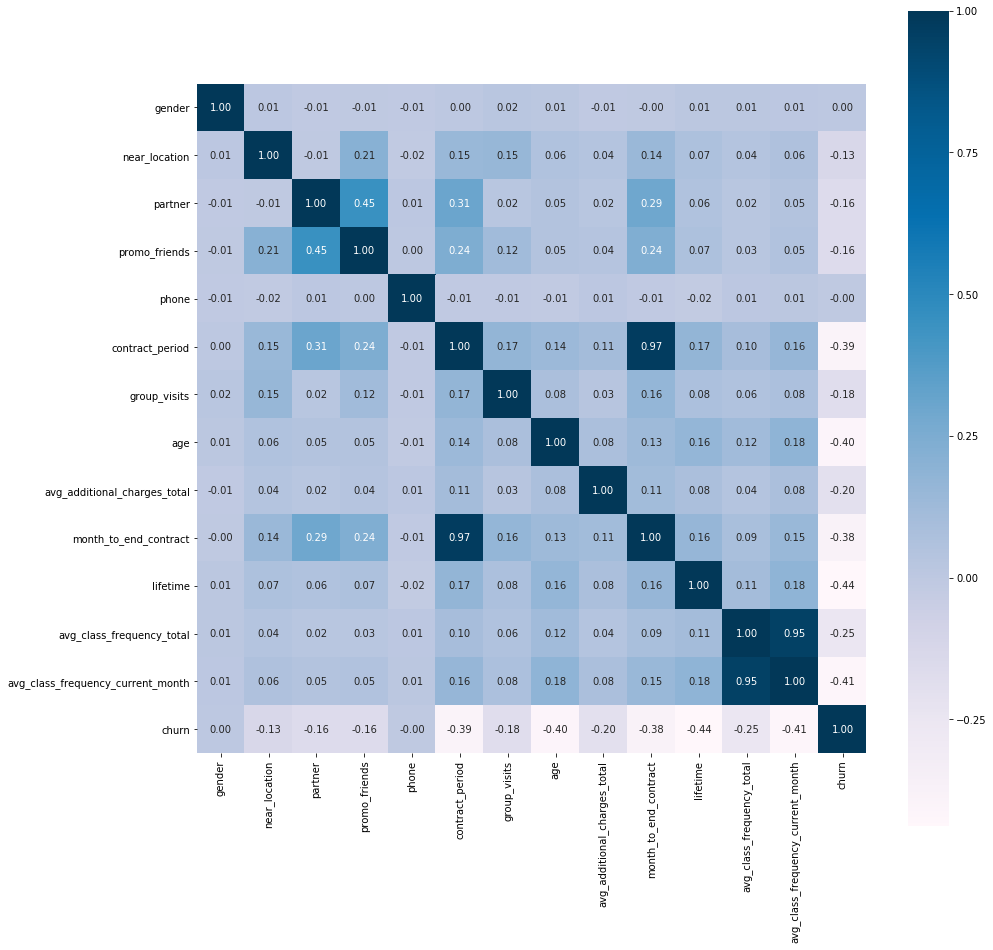

In [14]:
corr_m = fitness.corr()

plt.figure(figsize = (15,15))
sns.heatmap(corr_m, square = True, annot = True, fmt = '0.2f', cmap = 'PuBu')
plt.show()

# Выводы к шагу 2

На входе есть датасет с данными о клиентах сеть фитнес-центров «Культурист-датасаентист» содержащий 14 колонок и 4000 записей. Пропуски в датасете отсутствуют, данные приведены к нужным типам данных, дубликаты также не обнаружены. Судя по средним значениям отношение мужчин и женщин практически равное (0.51), большинство клиентов живут или работают в районе фитнес-центра (0.84), отношение партнёров и не партнёров фитнес-центра практически равное (0.48), по партнёрской программе «приведи друга» пришло относительно немного людей (0.30), большинство клиентов оставило свой контактный телефон (0.90), половина абонементов - на один месяц, групповые занятия посещает чуть меньше половины клинтов (0.40), средний возраст клиентов - 29 лет, средняя суммарная выручка от других услуг фитнес-центра - 146.94, средний срок до окончания текущего действующего абонемента - 4.32 месяца, в среднем время с момента первого обращения в фитнес-центр - 3.72 месяца, средняя частота посещений в неделю за все время с начала действия абонемента - 1.87 раза, средняя частота посещений в неделю за предыдущий месяц - 1.76, средний отток относительно небольшой - 0.26.

Посмотрев на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался, делаем вывод, что чаще уходят клиенты, которые не живут в районе фитнес-клуба, не является партнёрами фитнес-клуба, пришли не по записи в рамках акции «приведи друга», более молодые (средний возраст 26 лет), а также средние посещения которых меньше, оставшихся клиентов, т. е. посещают в среднем 1.47 раза в неделю (против 2.02 у тех кто остался).

Исходя из матрицы корреляций делаем вывод, что _мультиколлинеарными признаками_ являются - **contract_period - month_to_end_contract** и **avg_class_frequency_current_month - avg_class_frequency_total**. Также есть признаки, с _нулевой корреляцией с целевой переменной_: **phone** и **gender**.

# Шаг 3. Построение модели прогнозирования оттока клиентов

In [15]:
X = fitness.drop('churn', axis = 1)
y = fitness['churn']

**Логистическая регрессия**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

model = LogisticRegression()

model.fit(X_train, y_train)

# сделаем прогнозы
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:,1]

In [17]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83
F1: 0.85


**Случайный лес**

In [18]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)
 
# преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

In [19]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.81
F1: 0.83


# Выводы к шагу 3

Логистическая регрессия показала себя лучше, чем модель случайный лес на основании метрик:
* **Accuracy** _(доля правильных ответов)_ 0.93 у логистической регрессии против 0.92 у модели случайный лес;
* **Precision** _(точность)_ 0.86 против 0.84;
* **Recall** _(полнота)_ 0.83 против 0.81;
* **F1** - 0.85 против 0.83.

# Шаг 4. Кластеризация клиентов

In [20]:
fitness_client = fitness.drop(['churn'], axis = 1)

In [21]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(fitness_client)
x_sc = pd.DataFrame(x_sc, columns = fitness_client.columns).astype('float64')

In [22]:
linked = linkage(x_sc, method = 'ward')

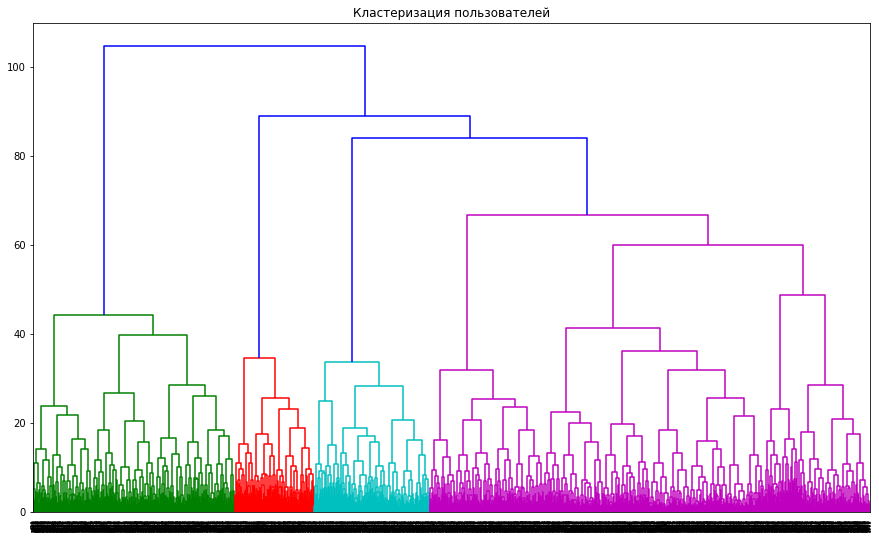

In [23]:
plt.figure(figsize = (15, 9))  
dendrogram(linked)
plt.title('Кластеризация пользователей')
plt.show()

На основании полученного графика предположим, что можно выделить **5 кластеров.**

In [24]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5)

# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(x_sc)

In [25]:
fitness['cluster'] = labels

In [26]:
fitness.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.523316,0.568312,0.480384,0.496805,0.498848
near_location,0.862694,0.847302,0.722978,0.948882,0.936636
partner,0.471503,0.275545,0.295436,0.819489,0.740783
promo_friends,0.305699,0.066590,0.013611,0.998403,0.479263
phone,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4.777202,2.670494,1.910328,3.039936,11.827189
group_visits,0.427461,0.445465,0.276221,0.440895,0.547235
age,29.297927,30.019518,28.118495,29.097444,29.891705
avg_additional_charges_total,144.208179,160.239255,129.750920,141.273179,163.647759
month_to_end_contract,4.466321,2.471871,1.818255,2.845048,10.785714


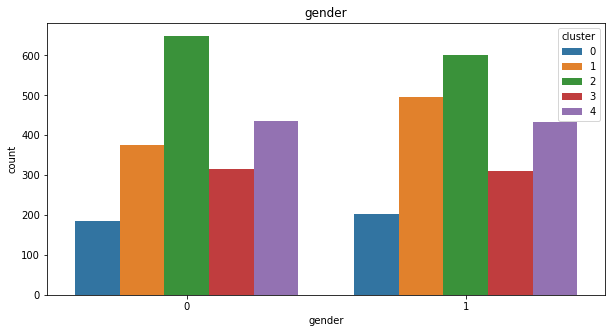

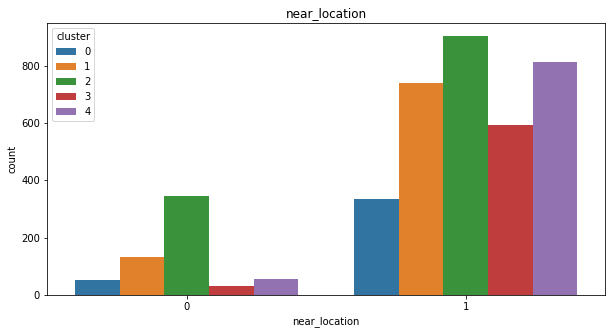

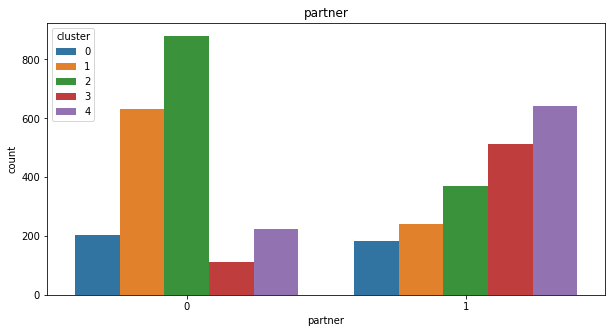

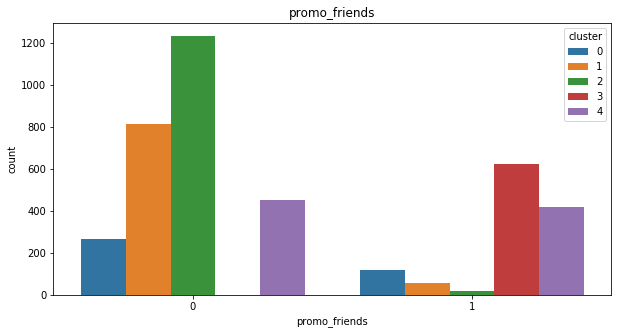

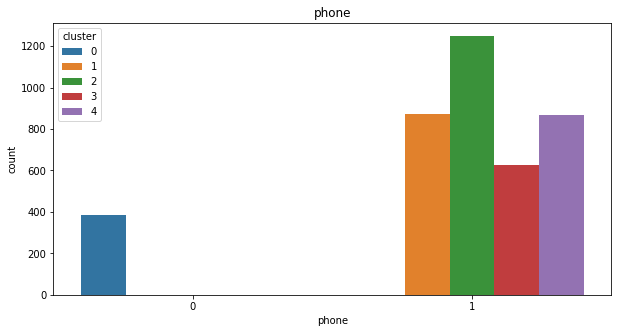

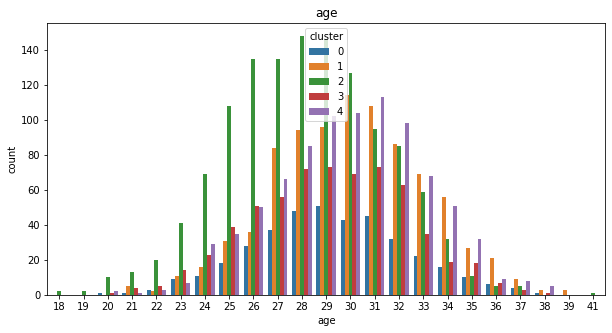

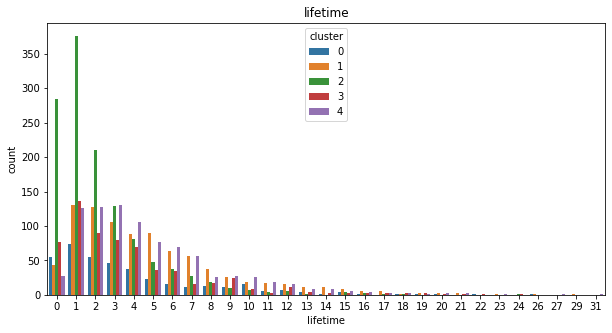

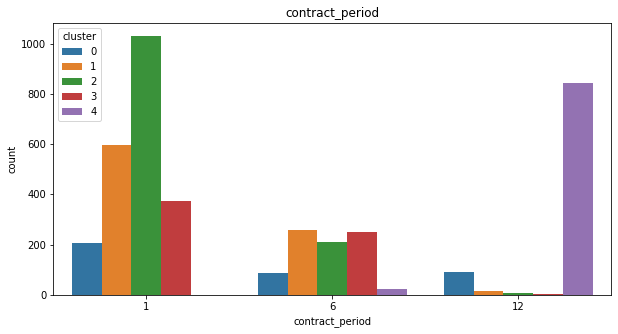

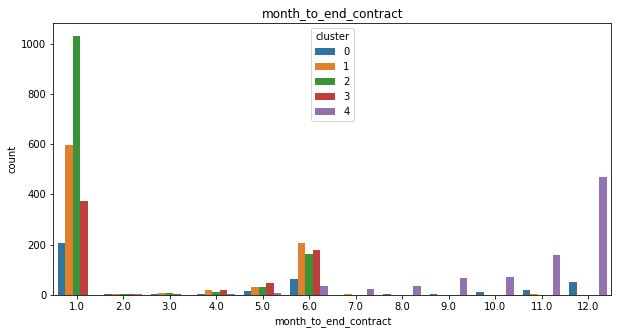

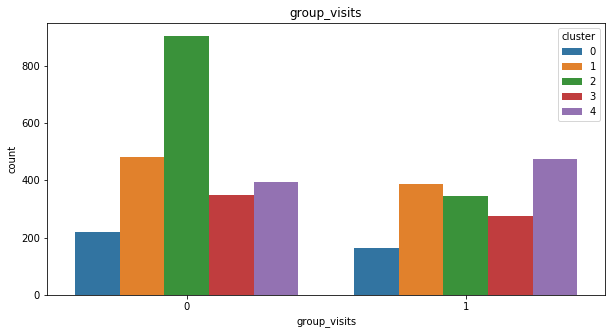

In [27]:
for col in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'age', 'lifetime', 'contract_period', 'month_to_end_contract', 'group_visits']:
    plt.figure(figsize = (10, 5))
    sns.countplot(data = fitness, x = fitness[col], hue='cluster')
    plt.title(col)
    plt.show()

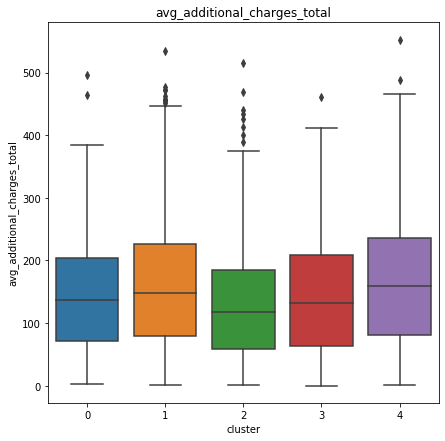

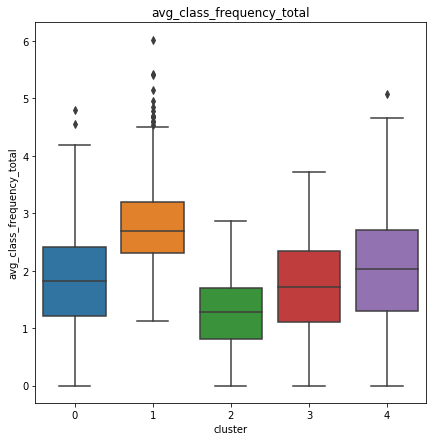

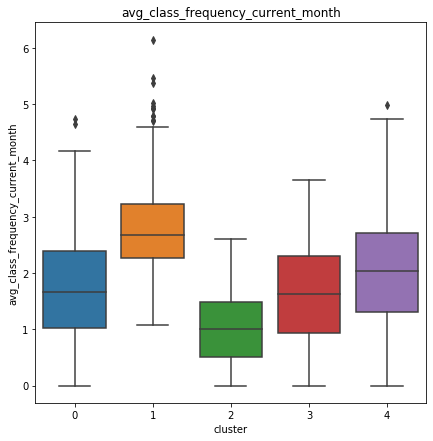

In [28]:
for col in ['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize = (7, 7))
    sns.boxplot(x = 'cluster', y = fitness[col], data = fitness)
    plt.title(col)
    plt.show()

In [29]:
print('Процент оттока по кластерам:{}'.format((fitness.groupby('cluster')['churn'].sum() / fitness.shape[0]) * 100))

Процент оттока по кластерам:cluster
0     2.575
1     1.825
2    17.625
3     4.025
4     0.475
Name: churn, dtype: float64


# Выводы к шагу 4

Исходя из полученных данных можно сделать вывод, что наименьший отток во 3 и 2 кластере, наибольший отток в 4 и 1 кластерах. 0 кластер - средний в плане оттока по сравнению в другими кластерами. Обобщая полученные данные делаем вывод, что отток происходит у клиентов, которые меньше посещают групповые занятия (0.46 и 0.54 против 0.21 и 0.34), более молодые (средний возраст 30.09 и 29.98 против 28.48 и 28.13), меньше тратящие (средняя суммарная выручка от других услуг фитнес-центра 161 и 160 против 135 и 130), с меньшим lifetime (время с момента первого обращения в фитнес-центр) - 4.94 и 4.73 против 2.80 и 2.35, с меньшей средней частотой посещений в неделю за предыдущий месяц - 2.80 и 1.98 против 1.48 т 0.99, с меньшей средней частотой посещений в неделю за все время с начала действия абонемента - 2.80 и 1.99 против 1.66 и 1.23.

# Общий вывод

На входе есть датасет с данными о клиентах сеть фитнес-центров «Культурист-датасаентист» содержащий 14 колонок и 4000 записей. Пропуски в датасете отсутствуют, данные приведены к нужным типам данных, дубликаты также не обнаружены. Судя по средним значениям отношение мужчин и женщин практически равное (0.51), большинство клиентов живут или работают в районе фитнес-центра (0.84), отношение партнёров и не партнёров фитнес-центра практически равное (0.48), по партнёрской программе «приведи друга» пришло относительно немного людей (0.30), большинство клиентов оставило свой контактный телефон (0.90), половина абонементов - на один месяц, групповые занятия посещает чуть меньше половины клинтов (0.40), средний возраст клиентов - 29 лет, средняя суммарная выручка от других услуг фитнес-центра - 146.94, средний срок до окончания текущего действующего абонемента - 4.32 месяца, в среднем время с момента первого обращения в фитнес-центр - 3.72 месяца, средняя частота посещений в неделю за все время с начала действия абонемента - 1.87 раза, средняя частота посещений в неделю за предыдущий месяц - 1.76, средний отток относительно небольшой - 0.26.

Посмотрев на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался, делаем вывод, что чаще уходят клиенты, которые не живут в районе фитнес-клуба, не является партнёрами фитнес-клуба, пришли не по записи в рамках акции «приведи друга», более молодые (средний возраст 26 лет), а также средние посещения которых меньше, оставшихся клиентов, т. е. посещают в среднем 1.47 раза в неделю (против 2.02 у тех кто остался).

Исходя из матрицы корреляций делаем вывод, что _мультиколлинеарными признаками_ являются - **contract_period - month_to_end_contract** и **avg_class_frequency_current_month - avg_class_frequency_total**. Также есть признаки, с _нулевой корреляцией с целевой переменной_: **phone** и **gender**.

Логистическая регрессия показала себя лучше, чем модель случайный лес на основании метрик:
* **Accuracy** _(доля правильных ответов)_ 0.93 у логистической регрессии против 0.92 у модели случайный лес;
* **Precision** _(точность)_ 0.86 против 0.84;
* **Recall** _(полнота)_ 0.83 против 0.81;
* **F1** - 0.85 против 0.83.

Исходя из полученных данных можно сделать вывод, что наименьший отток во 3 и 2 кластере, наибольший отток в 4 и 1 кластерах. 0 кластер - средний в плане оттока по сравнению в другими кластерами. Обобщая полученные данные делаем вывод, что отток происходит у клиентов, которые меньше посещают групповые занятия (0.46 и 0.54 против 0.21 и 0.34), более молодые (средний возраст 30.09 и 29.98 против 28.48 и 28.13), меньше тратящие (средняя суммарная выручка от других услуг фитнес-центра 161 и 160 против 135 и 130), с меньшим lifetime (время с момента первого обращения в фитнес-центр) - 4.94 и 4.73 против 2.80 и 2.35, с меньшей средней частотой посещений в неделю за предыдущий месяц - 2.80 и 1.98 против 1.48 т 0.99, с меньшей средней частотой посещений в неделю за все время с начала действия абонемента - 2.80 и 1.99 против 1.66 и 1.23.